In [14]:
#HYPOTHESIS TESTING - chi2 test for Homogenity


In [15]:
#Required modules 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
#Extracting necessary cols data from the CSV file.

df=pd.read_csv('C:\\Users\\Dell\\Desktop\\CSE\\IDS\\output_final.csv',encoding='unicode_escape',engine='python')
#df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
df_x = df[df['ted_event'].str.contains('TED')]
x_month_df = pd.DataFrame(df_x['film_date'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

In [17]:
#Required lists.
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


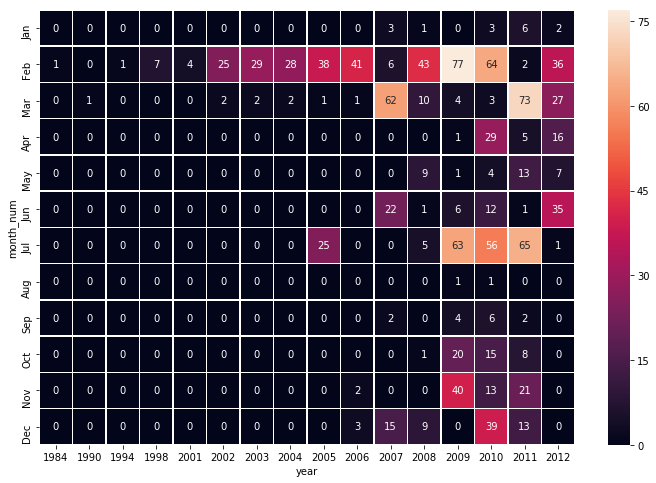

In [18]:
#Heatmap of frequency of videos published i each month of every year's TED version.
hmap_df = df.copy()
hmap_df = pd.pivot_table(hmap_df[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()
hmap_df['month_num'] = hmap_df['film_date'].apply(lambda x: months[x.split()[0]])
hmap_df['year'] = hmap_df['film_date'].apply(lambda x: x.split()[1])
hmap_df = hmap_df.sort_values(['year', 'month_num'])
hmap_df = hmap_df[['month_num', 'year', 'title']]
hmap_df = hmap_df.pivot('month_num', 'year', 'title')
hmap_df = hmap_df.fillna(0)

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_df, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)
plt.show()

In [20]:
#Contingency table values along with chi square and P value
from scipy import stats 

#     2009             2011
obs=[[81,8,68,60],[81,19,67,42]]

chi2, p, dof, ex = stats.chi2_contingency(obs)
print("\n degrees of freedom:",dof,"\n \n expected freq: ",ex,"\n \n chi2 value: ",chi2,"\n \n p value: ",p)


 degrees of freedom: 3 
 
 expected freq:  [[ 82.52112676  13.75352113  68.76760563  51.95774648]
 [ 79.47887324  13.24647887  66.23239437  50.04225352]] 
 
 chi2 value:  7.51777598213 
 
 p value:  0.0571034658009
